In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from pathlib import Path
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from treeinterpreter import treeinterpreter
from utils import draw_tree, waterfallplot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale 

pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
# listando archivos en directorio
# 'aps_failure_test_set.csv', 
# 'aps_failure_test_set_processed_8bit.csv', 
# 'aps_failure_training_set.csv', 
# 'aps_failure_training_set_processed_8bit.csv'

In [4]:
df_train = pd.read_csv('aps_failure_training_set.csv',na_values='na')
df_test = pd.read_csv('aps_failure_test_set.csv', na_values='na')

In [5]:
y_train = df_train['class']
y_train = y_train.replace('neg', 0)
y_train = y_train.replace('pos',1)
x_train = df_train.drop('class', axis=1)
x_train = x_train.fillna(x_train.mean())

In [6]:
y_test = df_test['class']
y_test = y_test.replace('neg', 0)
y_test = y_test.replace('pos',1)
x_test = df_test.drop('class', axis=1)
x_test = x_test.fillna(x_test.mean())

In [7]:
def score():print(m.oob_score_, m.score(x_test, y_test))

In [8]:
m = RandomForestRegressor(n_estimators=40,  n_jobs=-1, oob_score=True)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [9]:
pronostico = m.predict(x_test)

In [10]:
#Costo de Pronostico
U_check = 10 #cost that an unnecessary check
M_check = 500 # cost of missing a faulty truck

umbral = 0.00

Cost_1 = ((pronostico > umbral) & (y_test == 0.0)).sum()
Cost_2 = ((pronostico < umbral) & (y_test == 1.0)).sum()

Total_Cost = Cost_1*U_check + Cost_2*M_check
print('Total Cost: ', Total_Cost, Cost_1,  Cost_2)

Total Cost:  7320 732 0


In [11]:
result = np.array([tree.predict(x_test) for tree in m.estimators_])

In [12]:
np.mean(result,axis=0), np.std(result, axis=0)

(array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [13]:
[m.estimators_[i].score(x_test, y_test) for i in range(10)]

[0.164416,
 0.45386666666666664,
 0.295488,
 0.41563733333333336,
 0.45659733333333336,
 0.4948266666666667,
 0.4948266666666667,
 0.31187200000000004,
 0.4675200000000001,
 0.442944]

In [14]:
m.score(x_train, y_train)

0.9552256355932204

In [15]:
# Entiendo el valor del score es igual puesto que no disdrimine priorizar el costo
m.score(x_test, y_test)

0.7358472533333335

In [16]:
feat_importance = pd.DataFrame({'cols':x_train.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)
feat_importance.head(10)

,cols,imp
70,bj_000,0.280139
8,ag_002,0.068956
7,ag_001,0.056761
37,ay_005,0.052397
40,ay_008,0.023355
21,am_0,0.023346
38,ay_006,0.018926
20,al_000,0.016347
94,ci_000,0.014542
96,ck_000,0.010518


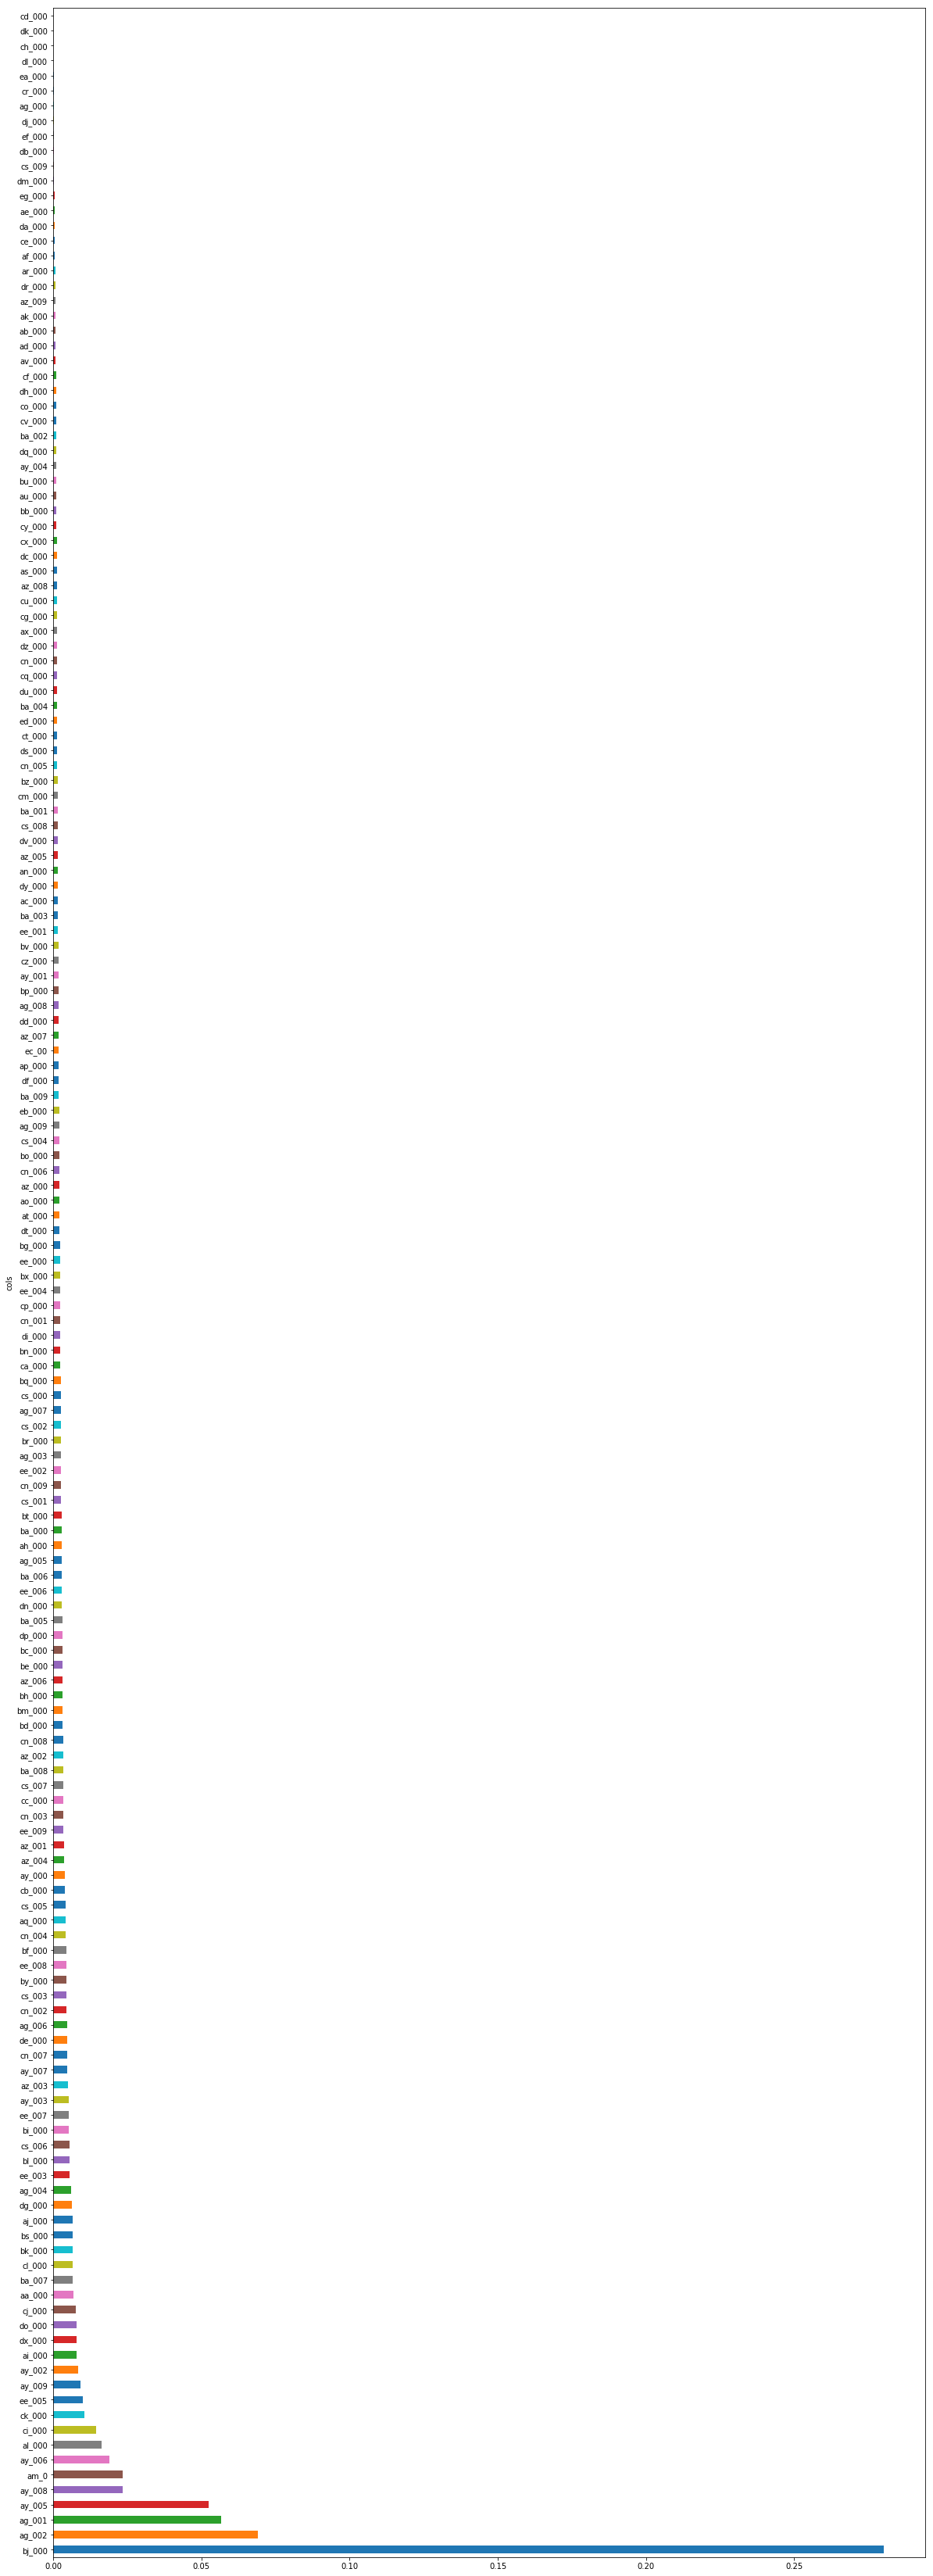

In [17]:
feat_importance.plot('cols', 'imp', 'barh', figsize=(20,60), legend=False);

In [18]:
sample = x_train.sample()
sample

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
53116,61180,0.713189,136.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,476.0,357550.0,3100326.0,903506.0,44618.0,516.0,2095022.0,0.0,140.0,0.0,0.0,0.0,3930802.0,3436696.0,866832.0,384312.0,0.0,0.0,0.0,0.0,760.0,250.0,0.0,0.0,0.0,0.0,0.0,526.0,714064.0,877574.0,2814828.0,0.0,2722.0,1384.0,4064.0,10414.0,157432.0,4228956.0,2020.0,0.0,0.0,0.0,1376564.0,1443714.0,446456.0,289700.0,194884.0,140664.0,132744.0,380886.0,1380.0,0.0,4798528.0,18.0,44.0,204.0,8.0,2095022.0,68276.0,454978.0,408950.0,203520.0,210180.0,224180.0,463710.833594,513147.820297,551389.799347,582871.32293,604886.613264,220740.0,61180.59,4798528.0,4798528.0,4768488.0,24745.0,4434.0,110152.0,1157880.0,4406992.0,1209600.0,123120.0,0.0,242.0,0.0,3725976.96,0.0,677851.2,8.0,1384.0,0.0,0.0,0.0,49256.0,1520598.0,2229198.0,585840.0,19814.0,2286.0,0.0,216.0,232.0,4798528.0,37.06298,5624.0,636.0,59604.0,386032.0,250144.0,3000580.0,669376.0,34488.0,508.0,0.0,194.0,650.0,3710164.0,70344.0,42.0,9444.0,0.0,0.0,3795960.0,4890.0,304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34530.0,53726.0,10492.0,0.0,0.0,152982.0,20672.0,28360.0,7664.0,10226.0,27854.0,0.0,0.0,2309690.0,1705.44,1710.0,726564.0,781786.0,504036.0,312694.0,1003104.0,1013352.0,60866.0,2328.0,2262.0,0.0,0.0,0.0


In [19]:
prediction, bias, contributions = treeinterpreter.predict(m, sample)
prediction[0], bias[0], y_train[sample.index[0]]

(0.0, 0.016674166666666667, 0)

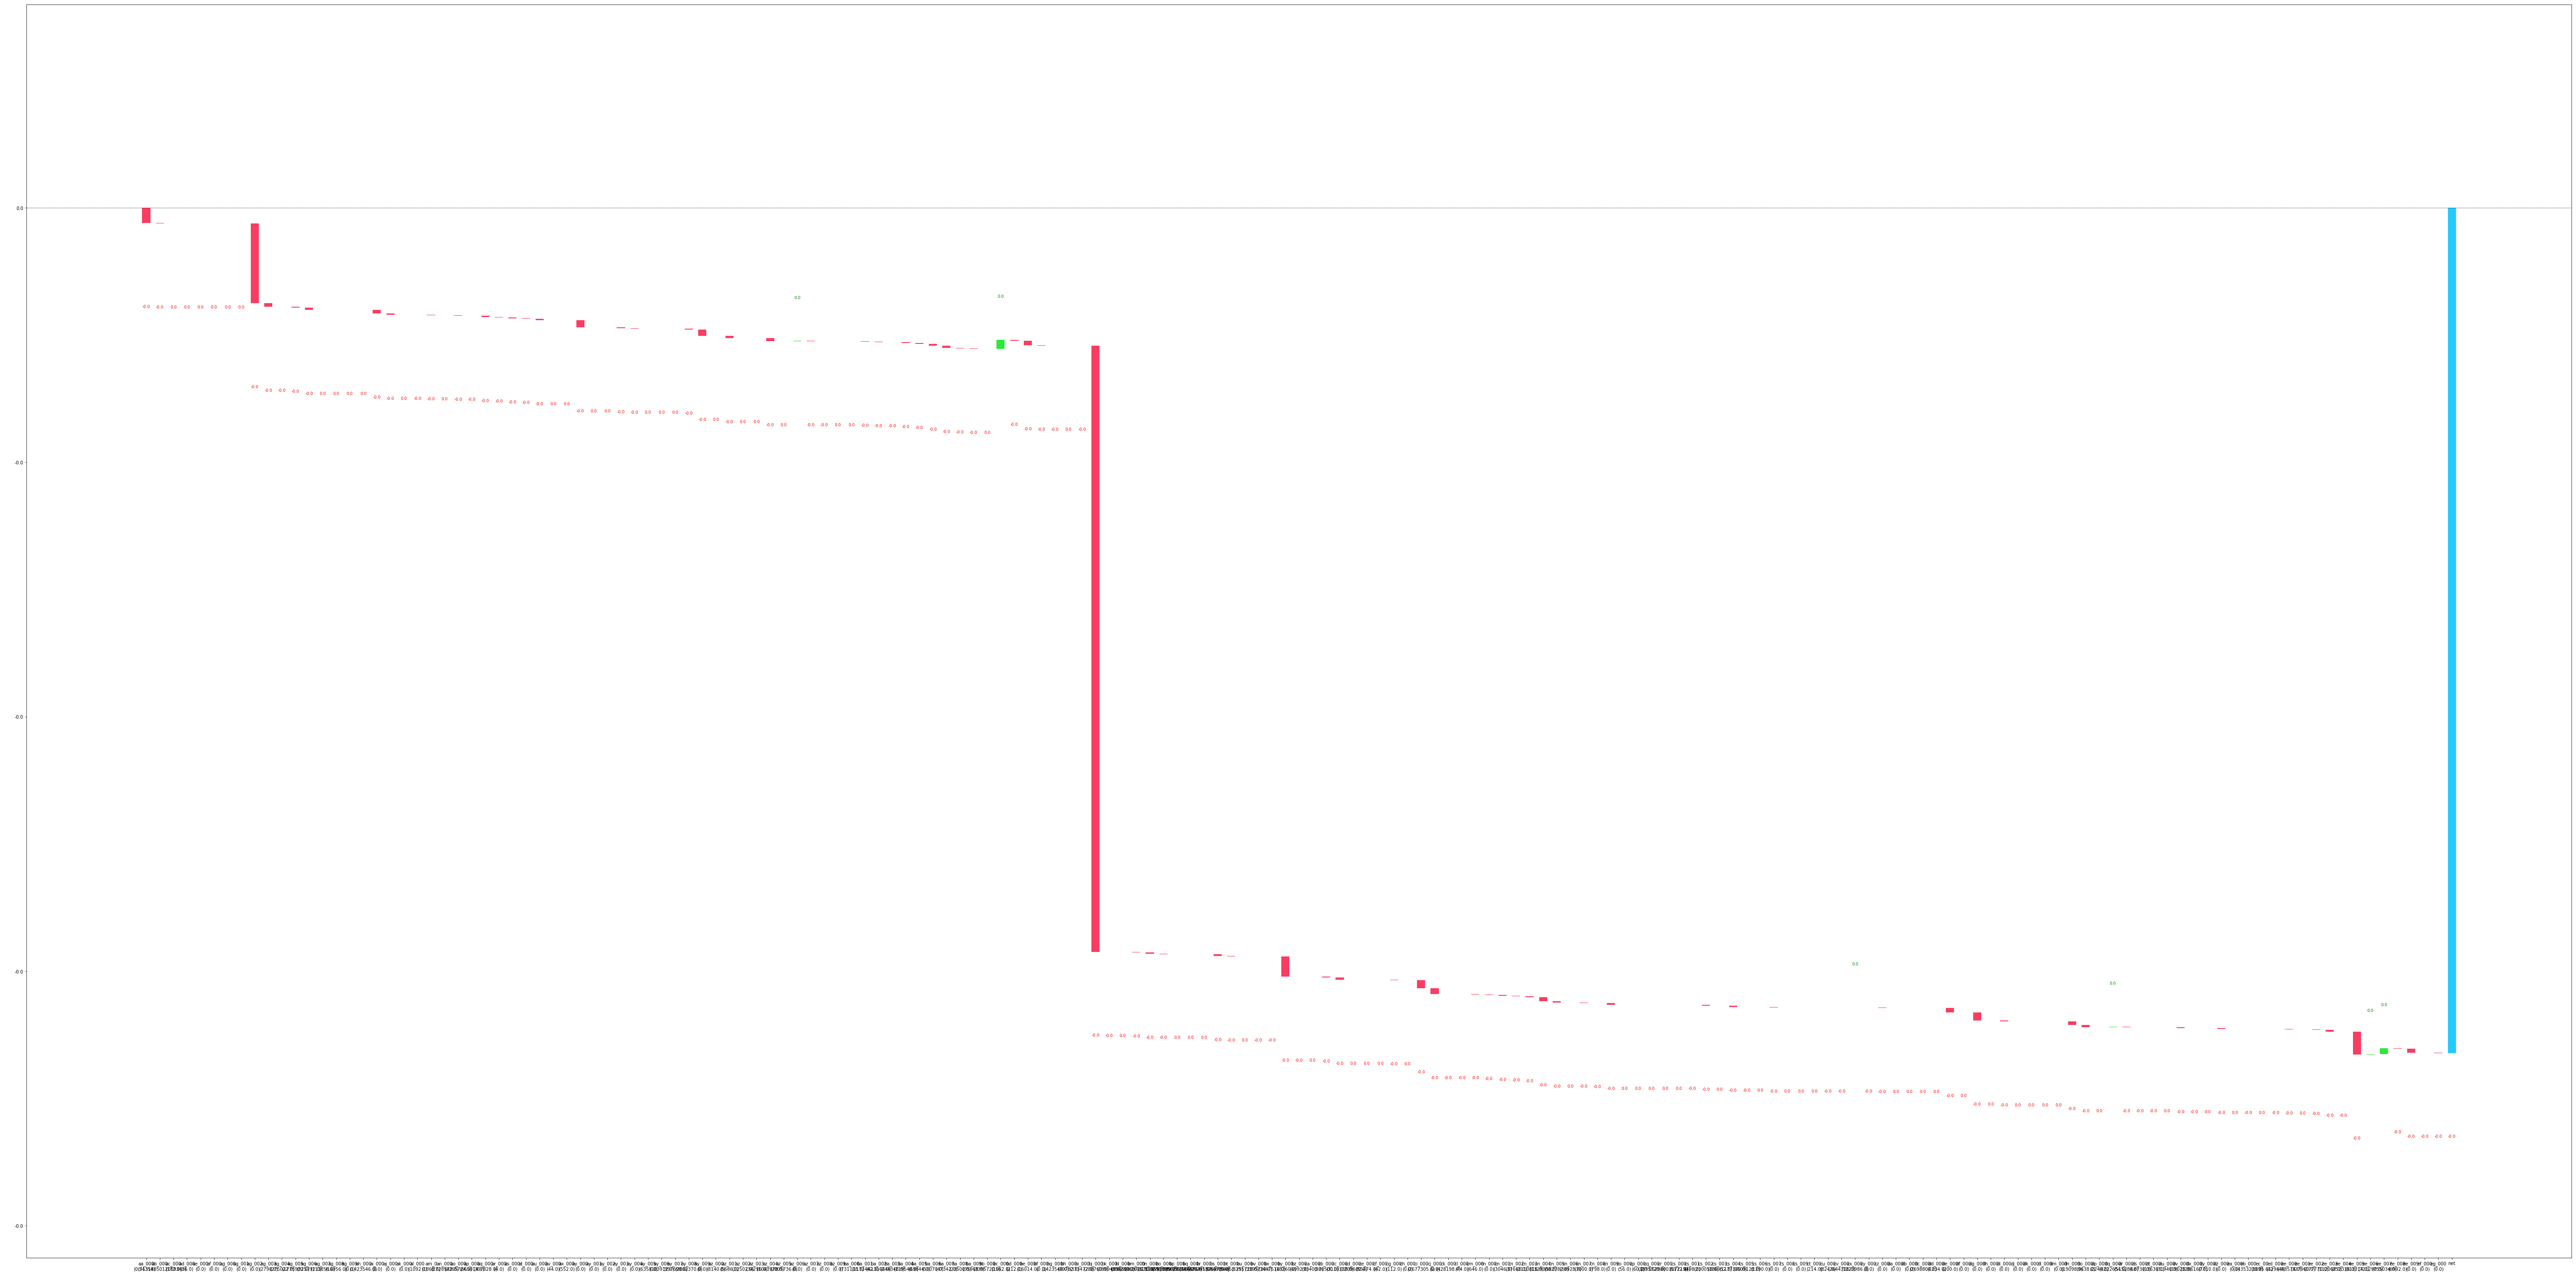

In [28]:
waterfallplot(sample, contributions[0], size=(80,40));